In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df['target'].unique()

array([0, 1], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

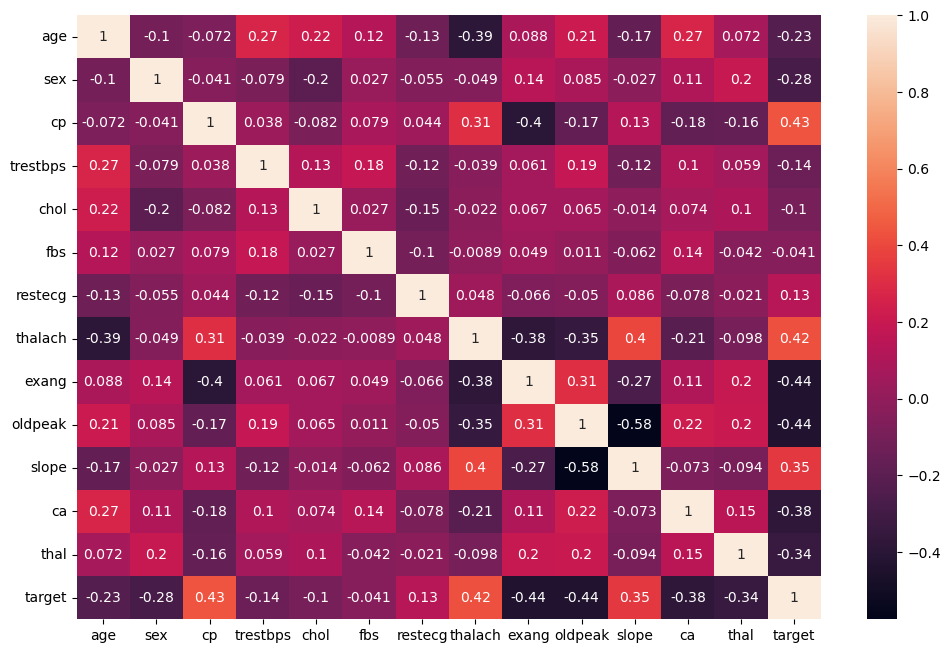

In [7]:
correlt=df.corr()
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(correlt,annot=True)

In [8]:
X=df.drop('target',axis=1)

In [9]:
y=df['target']

In [10]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

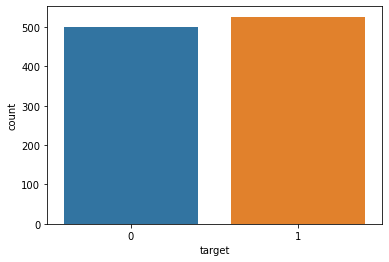

In [11]:
sns.countplot(x='target',data=df)

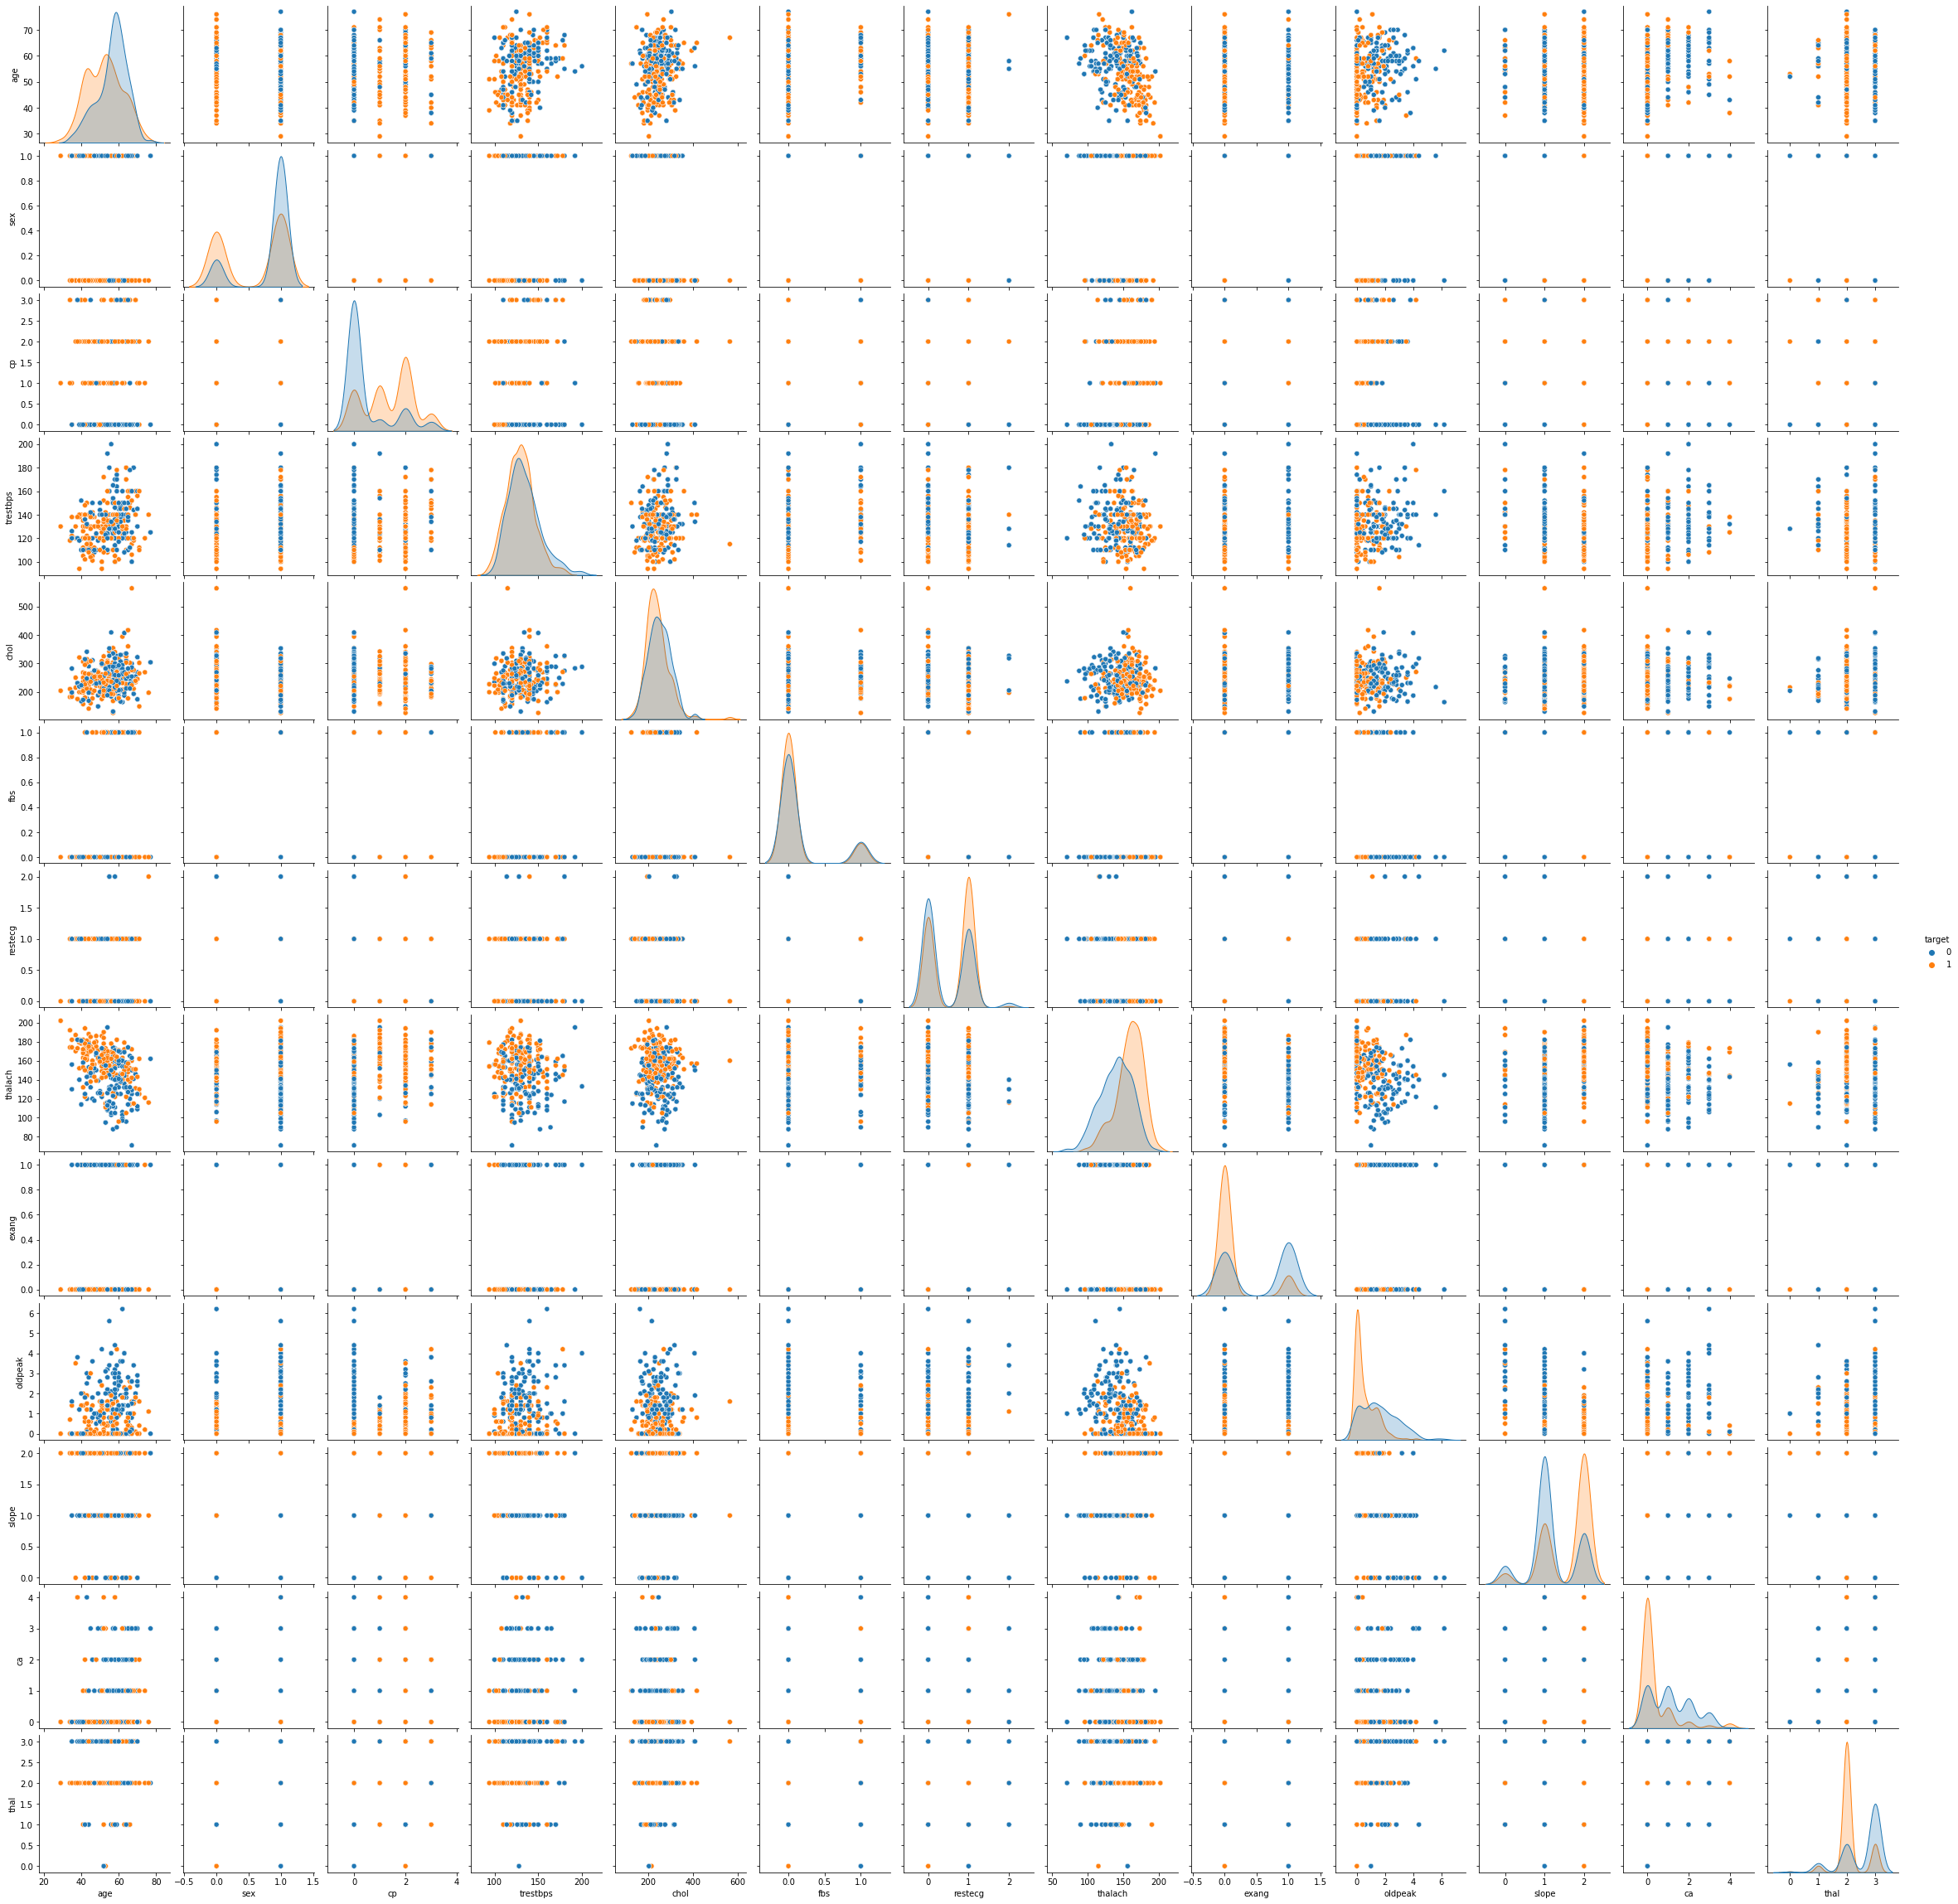

In [12]:
sns.pairplot(df, hue='target')

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

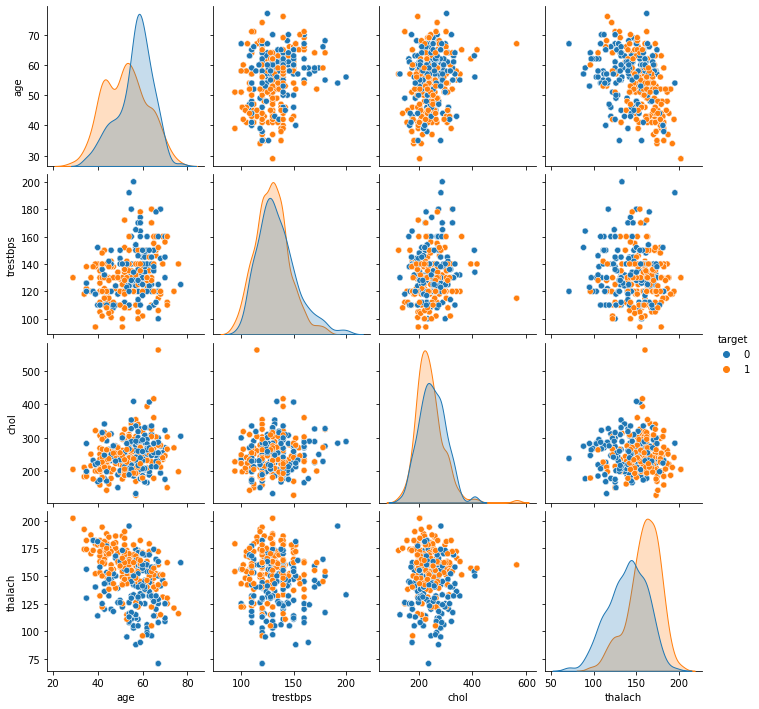

In [14]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
scaler= StandardScaler()

In [18]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegressionCV

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [21]:
log_model1=LogisticRegressionCV()

In [22]:
log_model1.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [23]:
log_model1.C_

array([0.00599484])

In [24]:
log_model1.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [25]:
log_model1.coef_[0]

array([-0.1093356 , -0.29001856,  0.36265298, -0.10367586, -0.06603391,
       -0.01985913,  0.09946636,  0.25597633, -0.28538996, -0.29238371,
        0.20479911, -0.32049603, -0.25727105])

In [26]:
coefs=pd.Series(index=X.columns,data=log_model1.coef_[0])

In [27]:
coefs

age        -0.109336
sex        -0.290019
cp          0.362653
trestbps   -0.103676
chol       -0.066034
fbs        -0.019859
restecg     0.099466
thalach     0.255976
exang      -0.285390
oldpeak    -0.292384
slope       0.204799
ca         -0.320496
thal       -0.257271
dtype: float64

<AxesSubplot:>

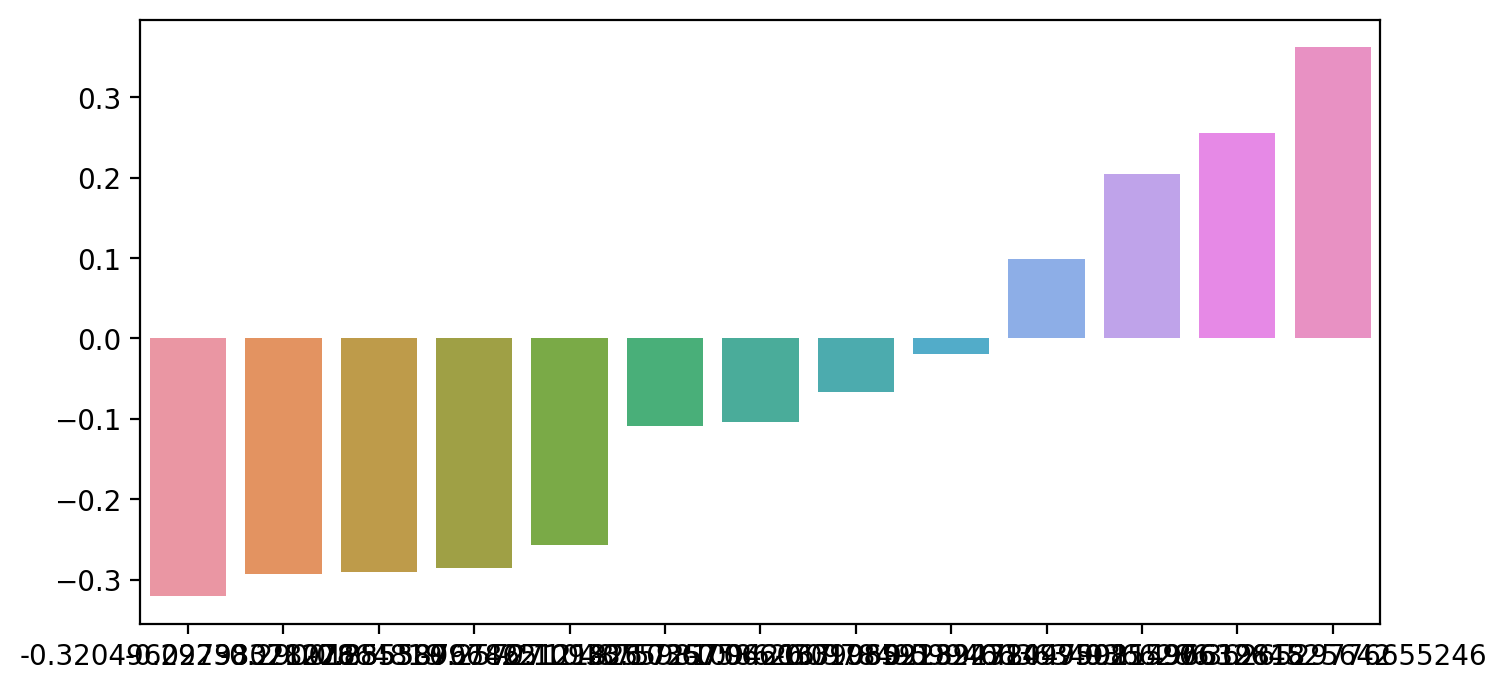

In [28]:
coefs=coefs.sort_values()
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=coefs,y=coefs.values)

In [29]:
y_pred1=log_model1.predict(scaled_X_test)

In [30]:
confusion_matrix(y_test,y_pred1)

NameError: name 'confusion_matrix' is not defined

In [ ]:
plot_confusion_matrix(log_model1,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred1))

In [ ]:
plot_precision_recall_curve(log_model1,scaled_X_test,y_test)

In [ ]:
plot_roc_curve(log_model1,scaled_X_test,y_test)

In [ ]:
patient=[[54.,1.,0.,122.,286.,0.,0.,116.,1.,
          3.2,1.,2.,2.]]

In [ ]:
log_model1.predict(patient)

In [ ]:
log_model1.predict_proba(patient)

In [ ]:
log_model=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [ ]:
grid_model.predict(patient)

In [ ]:
grid_model.predict_proba(patient)

In [ ]:
penalty=['l1','l2','elasticnet']
l1_ratio=np.linspace(0,1,10)
C=np.logspace(0,10,20)
param_grid={'penalty':penalty,
           'l1_ratio':l1_ratio,
           'C':C}

In [ ]:
grid_model=GridSearchCV(log_model,param_grid)

In [ ]:
grid_model.fit(scaled_X_train,y_train)

In [ ]:
y_pred=grid_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
grid_model.best_params_

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc,plot_roc_curve

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
recall_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(10, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()


In [ ]:
plot_multiclass_roc(grid_model,scaled_X_test,y_test,n_classes=2)

In [ ]:
plot_roc_curve(grid_model,scaled_X_test,y_test)